<a href="https://colab.research.google.com/github/vitormm44/materia-dl/blob/master/Tarefa_2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [21]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Carregando dataset e tratando dados

In [2]:
dataset = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
#Normalizar os dados

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [5]:
# Flatten the images

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [55]:
model = Sequential([
  Dense(64, activation='sigmoid', input_shape=(784,)),
  Dropout(0.3),
  Dense(64, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

model.compile(optimizer=Adam(lr=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

historico = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=20,
    batch_size=128,
    validation_data = (test_images, keras.utils.to_categorical(test_labels))
)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5998 - accuracy: 0.8260 - val_loss: 0.2417 - val_accuracy: 0.9301
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2912 - accuracy: 0.9122 - val_loss: 0.1814 - val_accuracy: 0.9459
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2417 - accuracy: 0.9266 - val_loss: 0.1645 - val_accuracy: 0.9510
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2229 - accuracy: 0.9319 - val_loss: 0.1492 - val_accuracy: 0.9534
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2066 - accuracy: 0.9366 - val_loss: 0.1372 - val_accuracy: 0.9574
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1911 - accuracy: 0.9412 - val_loss: 0.1496 - val_accuracy: 0.9535
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1852 - accuracy: 0.9434 - val_loss: 0.1319 - val_accuracy: 0.9596
Epoch 

In [56]:
historico.history

{'accuracy': [0.8260499835014343,
  0.9121999740600586,
  0.926633358001709,
  0.9318666458129883,
  0.9366166591644287,
  0.9412000179290771,
  0.9434166550636292,
  0.9429000020027161,
  0.9463666677474976,
  0.9454833269119263,
  0.9487666487693787,
  0.9488333463668823,
  0.9493333101272583,
  0.9510666728019714,
  0.9503499865531921,
  0.9523833394050598,
  0.9545000195503235,
  0.9514999985694885,
  0.9547666907310486,
  0.9571333527565002],
 'loss': [0.5998280644416809,
  0.29118016362190247,
  0.24167096614837646,
  0.2229309231042862,
  0.2066146284341812,
  0.1910730004310608,
  0.18517380952835083,
  0.18514934182167053,
  0.1723218411207199,
  0.17363835871219635,
  0.16254784166812897,
  0.16494743525981903,
  0.16118256747722626,
  0.15520255267620087,
  0.15582594275474548,
  0.14969788491725922,
  0.14382076263427734,
  0.1507979929447174,
  0.1423904150724411,
  0.13714155554771423],
 'val_accuracy': [0.9301000237464905,
  0.945900022983551,
  0.9509999752044678,
  0.9

Text(0.5, 1.0, 'Acurácia dos dados de treino e validação')

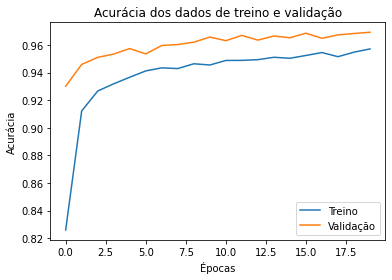

In [57]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Treino', 'Validação'])
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia dos dados de treino e validação')

Text(0.5, 1.0, 'Perda dos dados de treino e validação')

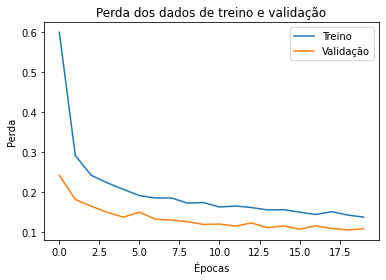

In [58]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Treino', 'Validação'])
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda dos dados de treino e validação')

Predições

In [68]:
predictions = model.predict(test_images)

acertos = sum(np.argmax(predictions, axis=1) == test_labels)

prediction_rate = acerto/len(test_labels)
print(prediction_rate)

(10000,)
0.9692
